Problem 6-2 \
Assignment 6 \
\
group members:
1) Shuhan Xiao (Uni-id: kg410 Matrikelnr.: 3160697), 
2) Klaus Kades (Uni-id: fw448 Matrikelnr.: 3408463), 
3) Lucas-Raphael Müller (Uni-id: al413 Matrikelnr.: 3205638), 
4) Melanie Schellenberg (Uni-id: qh400 Matrikelnr.: 3146390)

In [2]:
# Install a pip package in the current Jupyter kernel
! pip install numpy pandas networkx matplotlib powerlaw

In [3]:
import pandas as pd
import networkx as nx
import numpy as np

path = '/workplace/CNA/Complex-Network-Analysis-Exercises/assignment-6/facebook-links.txt.anon'
data = pd.read_csv(path, delimiter='\t')
data= data[['1', '2']]
#remove time stamp
print(data.head())

   1  2
0  1  3
1  1  4
2  1  5
3  1  6
4  1  7


In [4]:
def generate_graph(data, plot=True):
    g=nx.from_pandas_edgelist(data,source='1', target='2', create_using=nx.DiGraph())
    print(len(g.edges))
    g=g.to_undirected(reciprocal=False, as_view=False)
    print(len(g.edges))

    #control to not having multiple edges
    for node in g.nodes(): 
        # We look for adjacent nodes
        for adj_node in g[node]: 
            # If our graph has several edges from the first to the adjacent node
            if len(g[node][adj_node]) > 1: 
                print(node, adj_node)

    if plot==True:
        pos = nx.spring_layout(g, seed=1)
        nx.draw_networkx_edges(g, pos=pos)

    return g

In [5]:
g = generate_graph(data, plot=False)

1545685
817090


In [76]:
#6.2.1
def average_k(g):
    number_of_friends=[]
    number_of_friends_of_friends=[]
    for node in g.nodes():
        number_of_friends.append(len(g[node]))
        for adj_node in g[node]:
            number_of_friends_of_friends.append(len(g[adj_node]))
    print('average number of friends: ', np.mean(number_of_friends))
    print('average number of friends of friends (FOF): ', np.mean(number_of_friends_of_friends))
    return number_of_friends, number_of_friends_of_friends

In [82]:
import matplotlib.pyplot as plt
def plot(data_list, name_list):
    fig = plt.figure(figsize=(12, 8)) 
    ax = fig.add_subplot(1, 1, 1)

    for id, data in enumerate(data_list):
        data, bin_edges= np.histogram(data, bins=1000, range=None, normed=None, weights=None, density=None)
        x = bin_edges+(bin_edges[1]-bin_edges[0])/2
        #plotting
        ax.scatter(x[:-1], data, label=name_list[id])
        ax.set_xlabel('Degree (d)', fontsize=20)
        ax.set_ylabel('Frequency', fontsize=20)
        ax.tick_params(axis='both', which='major', labelsize=15)
        ax.set_yscale('log')
        ax.set_xscale('log')
        ax.legend()
        plt.title('degree distribution', fontsize=25)

average number of friends:  25.641838351822503
average number of friends of friends (FOF):  88.03001138185512


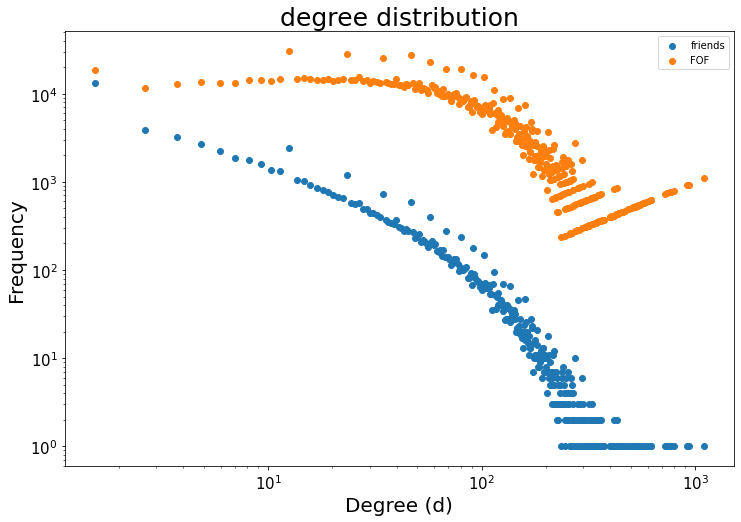

In [83]:
#6.2.2
number_of_friends, number_of_friends_of_friends=average_k(g)
plot([number_of_friends, number_of_friends_of_friends], ['friends', 'FOF'])


average number of friends:  0.0014
average number of friends of friends (FOF):  1.0


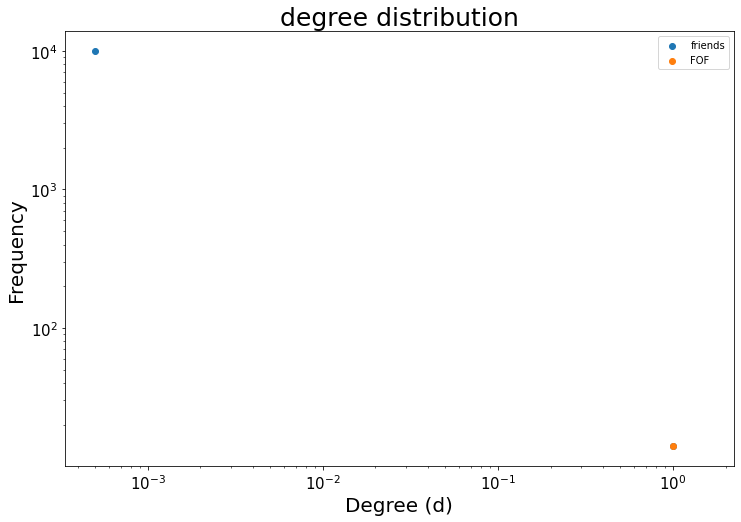

In [84]:
#6.2.3
g_random =nx.gnm_random_graph(n=10000, m=7, seed=2, directed=False)
number_of_friends, number_of_friends_of_friends=average_k(g_random)
plot([number_of_friends, number_of_friends_of_friends], ['friends', 'FOF'])
